# BikeSharing Data Analysis with Ford GoBike Data
## by Faisal Ali

## Investigation Overview

> I selected Ford GoBike dataset in order to investigate different behaviours among the people. There are a lot of different variables and our main focus is to define the most common variables which effect the bike sharing system.

## Dataset Overview

> The data consisted of 15 different variables such as age, gender, weekday, time and others. Our data is from 2017 of six months from June to December with 436822 rides. 75% of the users are below 45 age. There were users more than 100 years old. So, we can remove users more than 60 years old.
Also, new fields were generated to make our analysis easier.
Ford GoBike is available in multiple cities and we are focusing on San Francisco area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df1 = pd.read_csv('2017-fordgobike-tripdata.csv')

In [3]:
#creating copy of the dataframe
bike_clean = df1.copy()

In [4]:
# dropping nan values
bike_clean.dropna(inplace = True)

In [5]:
#to datetime
bike_clean.start_time = pd.to_datetime(bike_clean.start_time)
bike_clean.end_time = pd.to_datetime(bike_clean.end_time)

In [6]:
#to category
bike_clean.user_type = bike_clean.user_type.astype('category')
bike_clean.member_gender = bike_clean.member_gender.astype('category')

In [7]:
# to integer
bike_clean.member_birth_year = bike_clean.member_birth_year.astype('int')

## Age Distrubition of Users

>Here is the distrubition of users in terms of age. 75% of the users lie below 45. Some of the users entered their ages incorrectly, there are some users who are more than 100 years old.

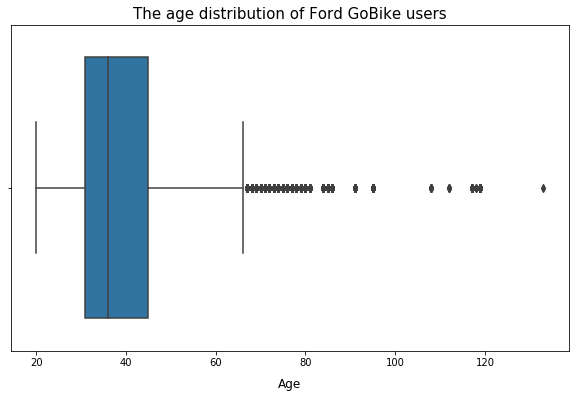

In [13]:
#calculate and store the age for users
bike_clean['member_age'] = 2019-bike_clean['member_birth_year']
#plotting boxplot
plt.figure(figsize = [10,6])
sb.boxplot(data = bike_clean, x = 'member_age');
plt.title("The age distribution of Ford GoBike users", fontsize = 15, y = 1)
plt.xlabel("Age", fontsize = 12, labelpad = 10);

In [14]:
bike_clean = bike_clean[bike_clean['member_age']<=60]

In [15]:
# Saving the dataframe to new_bike
bike_clean.to_csv("new_bike.csv", index=False)

In [16]:
# load our cleaned dataset
df = pd.read_csv('new_bike.csv')

## Bifurcation of riders base on age group

> From the plot we can clearly see that maximum users belong to the 30-40 age group followed by 40-50.

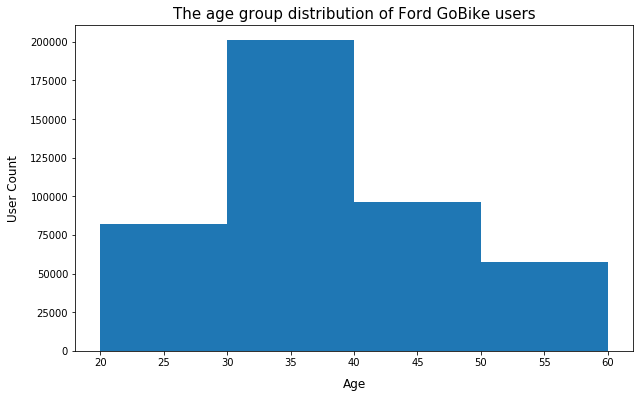

In [31]:
plt.figure(figsize = [10,6])
bin_edge = np.arange(20, df['member_age'].max()+10, 10)
plt.hist(data = df, x = 'member_age', bins = bin_edge);
plt.title("The age group distribution of Ford GoBike users", fontsize = 15, y = 1);
plt.xlabel("Age", fontsize = 12, labelpad = 10);
plt.ylabel("User Count", fontsize = 12, labelpad = 10);

## Gender of Users

> From the plot we can clearly see that 75.5% users are male, 22% are females and 1.4% are others


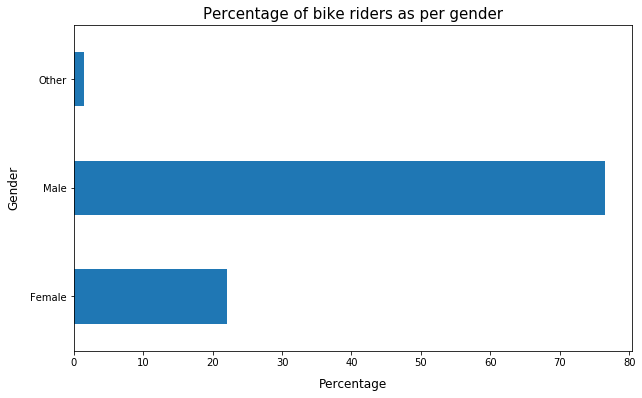

In [32]:
#creating a new dataframe
gender_type_df = df.groupby('member_gender').agg({'bike_id':'count'})
gender_type_df['perc'] = (gender_type_df['bike_id']/gender_type_df['bike_id'].sum())*100
plt.figure(figsize = [10,6])
base_color = sb.color_palette()[0]
gender_type_df['perc'].plot(kind='barh', color = base_color);
plt.title("Percentage of bike riders as per gender", fontsize = 15, y = 1);
plt.xlabel("Percentage", fontsize = 12, labelpad = 10);
plt.ylabel("Gender", fontsize = 12, labelpad = 10);

## Bifurcation of riders based on user type

> From the above plot we can clearly see that 89% are subscribers while 11% are customers.

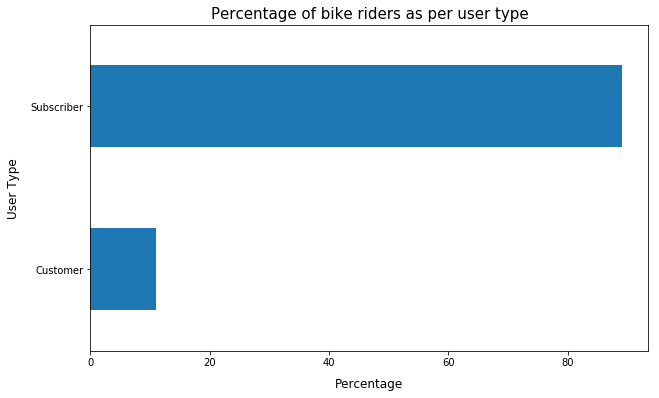

In [33]:
user_type_df = df.groupby('user_type').agg({'bike_id':'count'})
user_type_df['perc'] = (user_type_df['bike_id']/user_type_df['bike_id'].sum())*100
plt.figure(figsize = [10,6])
user_type_df['perc'].plot(kind='barh', color = base_color);
plt.title("Percentage of bike riders as per user type", fontsize = 15, y = 1);
plt.xlabel("Percentage", fontsize = 12, labelpad = 10);
plt.ylabel("User Type", fontsize = 12, labelpad = 10);

## Monthly trend for bike sharing service

> Here we can see that we have only 6 months data and we can say that its left skewed and there is slight dicrease at the end with most popular month being October.

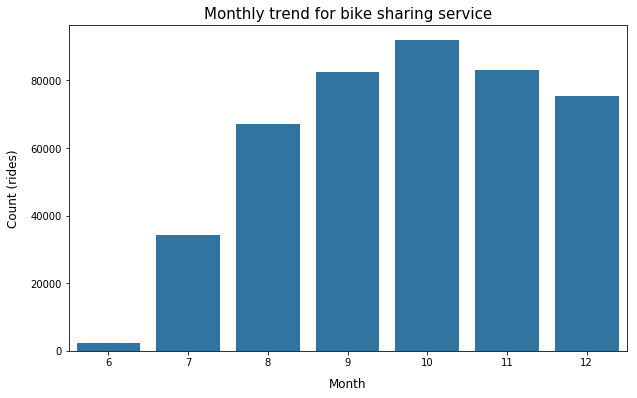

In [34]:
#extracting month from timestamp
df['start_time']=pd.to_datetime(df['start_time'])
df['start_time_date']=df['start_time'].dt.date
df['start_time_year_month']=df['start_time'].map(lambda x: x.strftime('%Y-%m'))
df['start_time_year_month_renamed'] = df['start_time'].dt.strftime('%y' + '-' + '%m')
df['start_time_year']=df['start_time'].dt.year.astype(int)
df['start_time_month']=df['start_time'].dt.month.astype(int)
#plotting the figure
plt.figure(figsize = [10,6])
sb.countplot(data = df, x = 'start_time_month', color = base_color);
plt.title("Monthly trend for bike sharing service", fontsize = 15, y = 1);
plt.xlabel("Month", fontsize = 12, labelpad = 10);
plt.ylabel("Count (rides)", fontsize = 12, labelpad = 10);

## Popular starting hours for trip among users

> From the  plot we can see that 8'o clock in the morning and 5'o clock in the evening are the most popular bike riding times.

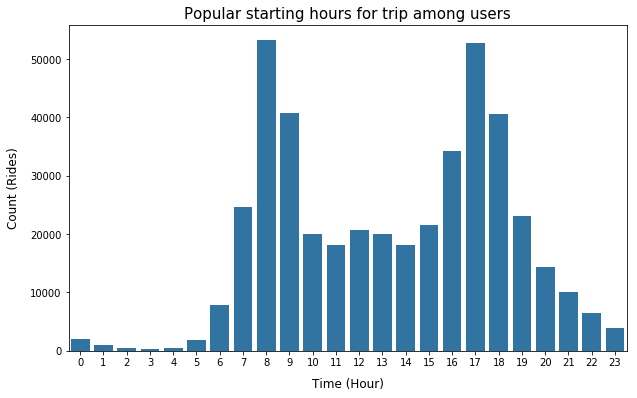

In [36]:
#extracting hour from start_time 
df['start_time_hour_minute']=df['start_time'].map(lambda x: x.strftime('%H-%m'))
df['start_time_hour']=df['start_time'].dt.hour
plt.figure(figsize = [10,6])
sb.countplot(data = df, x = 'start_time_hour', color = base_color);
plt.title("Popular starting hours for trip among users", fontsize = 15, y = 1);
plt.xlabel("Time (Hour)", fontsize = 12, labelpad = 10);
plt.ylabel("Count (Rides)", fontsize = 12, labelpad = 10);

## Popular weekdays of the week among users

> From the plot we can see that Tuesday and Wednesday are the most popular days of the week.

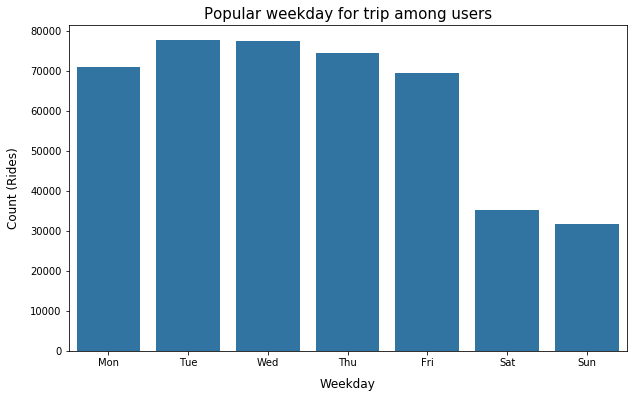

In [37]:
#extracting the weekday
df['start_time_weekday']=df['start_time'].dt.weekday_name
df['start_time_weekday_abbr']=df['start_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])
plt.figure(figsize = [10,6])
week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.countplot(data = df, x = 'start_time_weekday_abbr', order = week, color = base_color);
plt.title("Popular weekday for trip among users", fontsize = 15, y = 1);
plt.xlabel("Weekday", fontsize = 12, labelpad = 10);
plt.ylabel("Count (Rides)", fontsize = 12, labelpad = 10);

## Relationship between Gender and Age

> From the violin plot we have observed that females in age group 30-35 use the service more as compared to men.

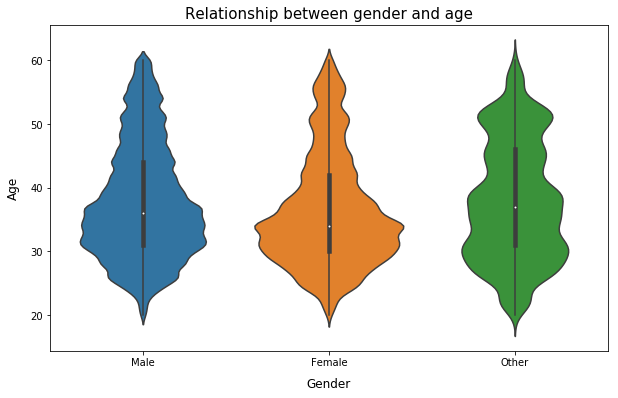

In [38]:
plt.figure(figsize = [10,6])
sb.violinplot(data = df, x = 'member_gender', y = 'member_age');
plt.title("Relationship between gender and age", fontsize = 15, y = 1);
plt.xlabel("Gender", fontsize = 12, labelpad = 10);
plt.ylabel("Age", fontsize = 12, labelpad = 10);

## Relation between Gender and Start Time

> From the above plot we see a similar pattern between males and females as both have peak times between 5-10 and 15-20.

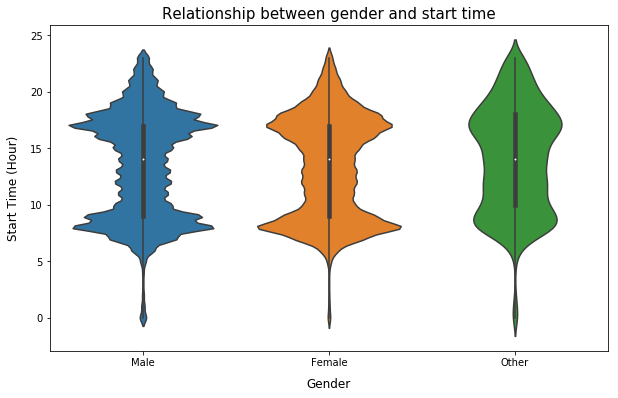

In [39]:
plt.figure(figsize = [10,6])
sb.violinplot(data = df, x = 'member_gender', y = 'start_time_hour');
plt.title("Relationship between gender and start time", fontsize = 15, y = 1);
plt.xlabel("Gender", fontsize = 12, labelpad = 10);
plt.ylabel("Start Time (Hour)", fontsize = 12, labelpad = 10);

## Monthly trend of users based on user type

> From the above plot we notice that for Customer the traffic is highest in September while for Subscriber its highest in October.

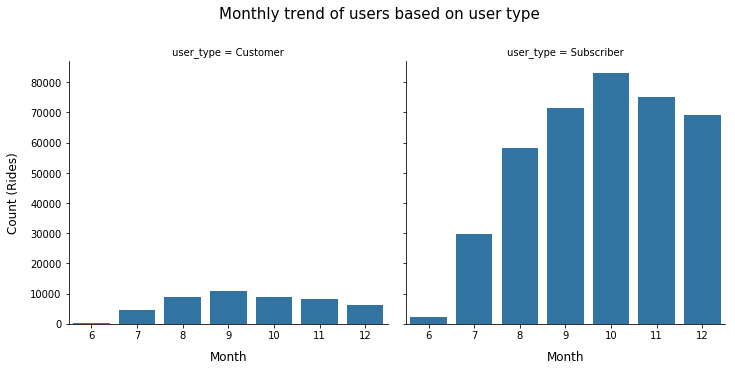

In [69]:
mnt = [6, 7, 8, 9, 10, 11, 12]
g = sb.FacetGrid(data = df, col = 'user_type', height = 5, margin_titles = True);
g.map(sb.countplot, 'start_time_month', order = mnt)
g.axes[0,0].set_xlabel('Month', fontsize = 12, labelpad = 10);
g.axes[0,1].set_xlabel('Month', fontsize = 12, labelpad = 10);
g.axes[0,0].set_ylabel('Count (Rides)', fontsize = 12, labelpad = 10);
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Monthly trend of users based on user type', fontsize = 15, y = 1);

## Average ride duration based on user type

> We found out that the average trip duration for subscriber is 11.7 minutes while for customer it is 31 minutes.

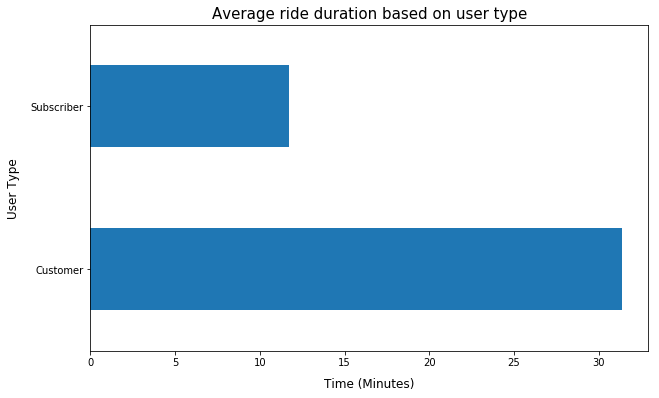

In [71]:
df['duration_min'] = df['duration_sec']/60
plt.figure(figsize = [10,6]);
df.groupby('user_type')['duration_min'].mean().plot(kind='barh', color = base_color);
plt.title("Average ride duration based on user type", fontsize = 15, y = 1);
plt.xlabel("Time (Minutes)", fontsize = 12, labelpad = 10);
plt.ylabel("User Type", fontsize = 12, labelpad = 10);

## Relation between gender, age and ride duration

> We wanted to bifurcate data among gender, age and ride duration and found out an interesting thing that is that other gender type rides for very short duation throughout the whole age group, females ride for longer duration but as age increases they also ride for shorter duration but for men the number remain higher.

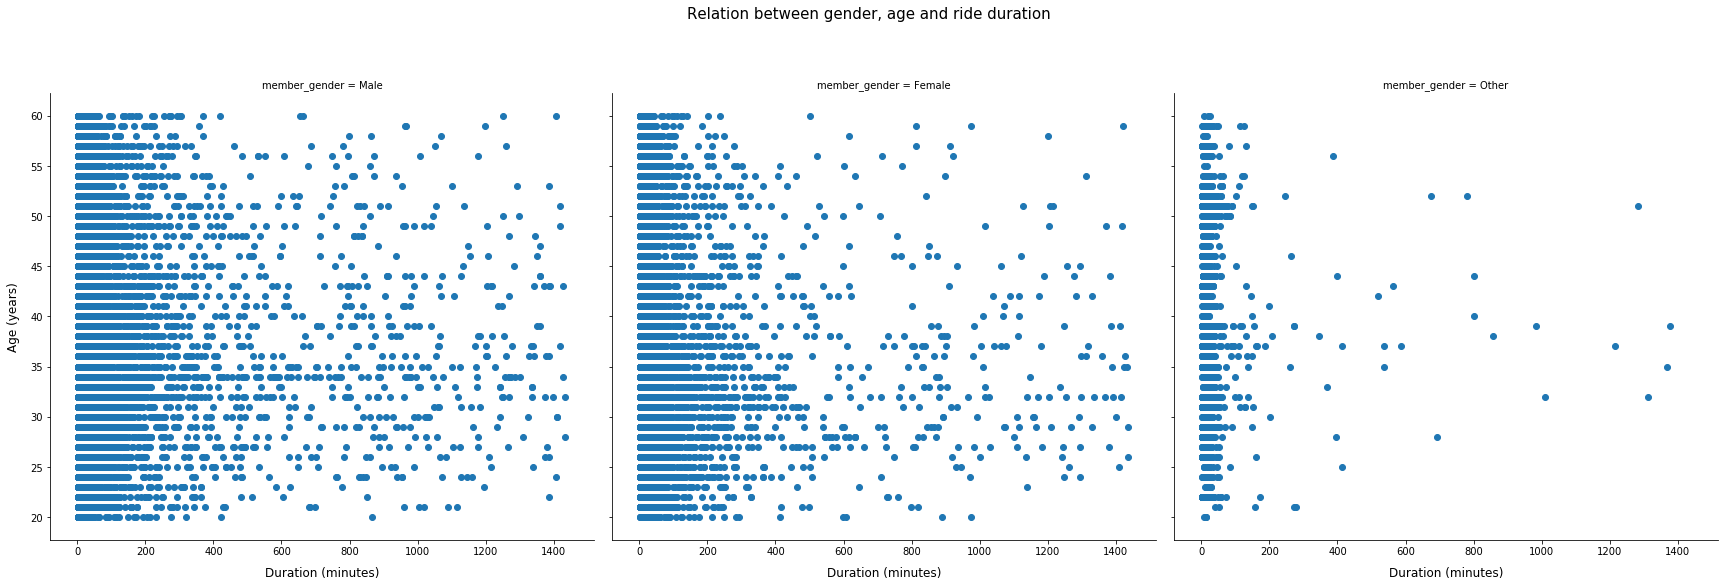

In [73]:
g = sb.FacetGrid(data = df, col = 'member_gender', height = 8);
g.map(plt.scatter, 'duration_min', 'member_age');
g.axes[0,0].set_xlabel('Duration (minutes)', fontsize = 12, labelpad = 10);
g.axes[0,1].set_xlabel('Duration (minutes)', fontsize = 12, labelpad = 10);
g.axes[0,2].set_xlabel('Duration (minutes)', fontsize = 12, labelpad = 10);
g.axes[0,0].set_ylabel('Age (years)', fontsize = 12, labelpad = 10);
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Relation between gender, age and ride duration', fontsize = 15, y = 1);